# Experiment: Global Temperature Anomalies

In [57]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sys
from matplotlib.colors import LinearSegmentedColormap, ListedColormap
from tueplots import bundles
from tueplots.constants.color import rgb

plt.rcParams.update(bundles.beamer_moml())

rb = LinearSegmentedColormap.from_list(
    "rb", [rgb.tue_blue, [1, 1, 1], rgb.tue_red], N=500
)

import xarray as xr
import cartopy.crs as ccrs  # plotting library for geospatial data

sys.path.insert(1, os.path.abspath(os.getcwd()[:-3]))

Import Data

In [3]:
data = xr.open_dataset("../dat/NOAAGlobalTemp_v5.0.0_gridded_s188001_e202212_c20230108T133308.nc")
df = data.to_dataframe()
df.head()

anom
time       lat   lon  z        
1880-01-01 -87.5 2.5  0.0   NaN
                 7.5  0.0   NaN
                 12.5 0.0   NaN
                 17.5 0.0   NaN
                 22.5 0.0   NaN

In [174]:
# average data over whole year 2022

# select data for each month of year 2022
dt64_start = np.datetime64('2022-01-01T00:00:00.000000000')
dt64_end = np.datetime64('2022-12-01T00:00:00.000000000')

filtered_data = data.sel(time=slice(dt64_start, dt64_end))
# dataframe now contains 12 months
filtered_data


<xarray.Dataset>
Dimensions:  (time: 12, lat: 36, lon: 72, z: 1)
Coordinates:
  * time     (time) datetime64[ns] 2022-01-01 2022-02-01 ... 2022-12-01
  * lat      (lat) float32 -87.5 -82.5 -77.5 -72.5 -67.5 ... 72.5 77.5 82.5 87.5
  * lon      (lon) float32 2.5 7.5 12.5 17.5 22.5 ... 342.5 347.5 352.5 357.5
  * z        (z) float32 0.0
Data variables:
    anom     (time, z, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
Attributes: (12/66)
    Conventions:                     CF-1.6, ACDD-1.3
    title:                           NOAA Merged Land Ocean Global Surface Te...
    summary:                         NOAAGlobalTemp is a merged land-ocean su...
    institution:                     DOC/NOAA/NESDIS/National Centers for Env...
    id:                               gov.noaa.ncdc:C00934 
    naming_authority:                 gov.noaa.ncei 
    ...                              ...
    time_coverage_duration:          P143Y0M
    references:                      Vose, R. S., et al., 2012: NOAAs merged ...
    climatology:                     Climatology is based on 1971-2000 monthl...
    acknowledgment:                  The NOAA Global Surface Temperature Data...
    date_modified:                   2023-01-08T18:33:09Z
    date_issued:                     2023-01-08T18:33:09Z

In [175]:
# average over all 12 months
filtered_data = filtered_data.mean(dim = ("time"))
filtered_data

<xarray.Dataset>
Dimensions:  (lat: 36, lon: 72, z: 1)
Coordinates:
  * lat      (lat) float32 -87.5 -82.5 -77.5 -72.5 -67.5 ... 72.5 77.5 82.5 87.5
  * lon      (lon) float32 2.5 7.5 12.5 17.5 22.5 ... 342.5 347.5 352.5 357.5
  * z        (z) float32 0.0
Data variables:
    anom     (z, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan

Text(0.5, 1.0, 'Surface Temperature Anomalies - Year 2022')

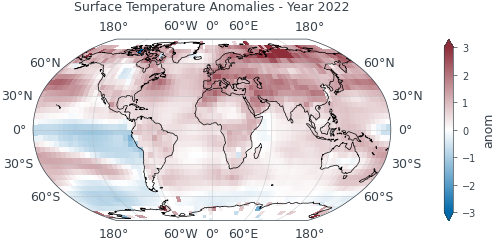

In [176]:
# Create a plot
plt.rcParams.update(bundles.beamer_moml())
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())
#ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

ax.coastlines()
filtered_data["anom"].plot(ax=ax, transform=ccrs.PlateCarree(), cmap=rb, vmin=-3, vmax=3)


gl = ax.gridlines(
    crs=ccrs.PlateCarree(),
    draw_labels=True,
    linewidth=.5,
    color=rgb.tue_gray,
    alpha=0.5,
    linestyle="-",
)
gl.top_labels = True
gl.right_labels = True

plt.title("Surface Temperature Anomalies - Year 2022")

In [6]:
df = pd.read_csv(os.path.relpath('../dat/temp_anomalies_mothly/box.1.v5.0.0.202212.txt'), delim_whitespace=True)
df.columns = ["year", "lat", "lon", "z", "anom"]
df.head
df = df[df["year"] == 2020]
df = df[["lat", "lon", "anom"]]

In [ ]:
"""
from shapely.geometry import Point
import geopandas as gpd

# Load world countries shapefile with coastlines from Natural Earth
#world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Load world coastlines shapefile from Natural Earth
#coastlines = gpd.read_file(gpd.datasets.get_path('naturalearth_coastline')) 
coastlines = gpd.read_file(os.path.relpath('../dat/naturalearth/ne_10m_coastline.shp')) 


#point = gpd.GeoDataFrame(geometry=[Point(longitude, latitude)], crs="EPSG:4326")

# Plot the world map with coastlines
fig, ax = plt.subplots(figsize=(10, 8))
coastlines.plot(ax=ax, color='black')


df.plot(ax = ax, x="lon", y="lat", kind="scatter", c="anom",
        colormap=rb)


#df.plot(x='lat', y = 'lon', c ='anom', colormap=rb, vmin=-3, vmax=3)

#point.plot(ax=ax, marker='o', color='red', markersize=50)  # Plot the data point in red

# Set plot title
plt.title('World Map with Coastlines and Data Point')

# Show the plot
plt.show()
"""


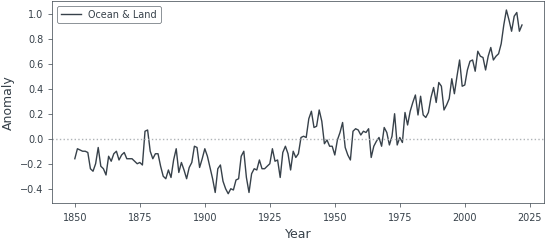

In [13]:
df = pd.read_csv(os.path.relpath('../dat/temp_anomalies_annualy_timeseries.csv'), sep = ',')

fig, ax = plt.subplots()

import logging
logging.getLogger('matplotlib.font_manager').disabled = True

ax = sns.lineplot(df, x = 'Year', y = 'Anomaly', color = rgb.tue_dark, label='Ocean & Land')
ax.axhline(y=0, linewidth=1, color=rgb.tue_gray, ls=':')

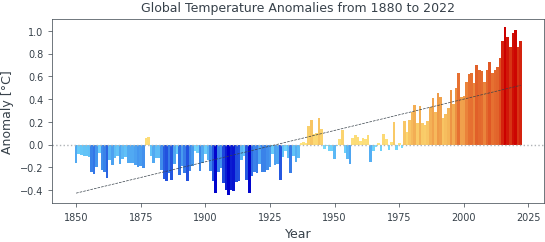

In [108]:
x = df['Year'].to_numpy()
y = df['Anomaly'].to_numpy()

fig, ax = plt.subplots()

# create colormap by stacking red cm (for values larger than 0) and blue cm (for values smaller than zero)
colors_warm = [(1, 0.8 , 0, 0.5), (0.8, 0, 0, 1)]   # Orange, Dark Red
colors_cold = [(0, 0, 0.8, 1), (0, 0.8, 1, 0.5)]  # Dark Blue, Light Blue

cm2 = LinearSegmentedColormap.from_list('cm2', colors_warm, N=256)
cm3 = LinearSegmentedColormap.from_list('cm3', colors_cold, N=256)

newcolors = np.vstack((cm3(np.linspace(0, 1, 128)),
                       cm2(np.linspace(0, 1, 128))))

warm_cold_cm = ListedColormap(newcolors, name='RedBlue')

# since colormap scales colors according to values between 0 and one, we want to 
# assign anomalies > 0 a value between 0.5 and 1, so its drawn orange / red and anomalies
# and assign anomalies <0 a value between 0 and 0.5 so its drawn blue
def rescale(y):
    result = np.zeros(y.shape)
    for i in range(0, y.shape[0]):
        elem = y[i]
        if elem >= 0:
            result[i] = elem / (2*np.max(y)) + 0.5
        else:
            result[i] = np.abs(elem) / (2*np.min(y)) + 0.5
    return result
    

# plot anomalies over years
ax.bar(x, y, color=warm_cold_cm(rescale(y)), width=1)
ax.axhline(y=0, linewidth=1, color=rgb.tue_gray, ls=':')
ax.set_xlabel("Year")
ax.set_ylabel("Anomaly [°C]")
ax.set_title("Global Temperature Anomalies from 1880 to 2022")

#add regression line
b,a = np.polyfit(x, y, deg = 1)
xseq = np.linspace(np.min(x), np.max(x), num=100)
ax.plot(xseq, a + b * xseq, color=rgb.tue_dark, lw=0.5, ls='--')